## Importing important modules

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Loading the MNIST Data set

Loading the train dataset

In [2]:
# Load the MNIST dataset from google for handwritten digits recognisition
mnist = tfds.load("mnist", split="train", as_supervised=True)
mnist = mnist.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist = mnist.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Loading the test dataset

In [3]:
# Evaluating the model
mnist_test = tfds.load('mnist', split="test", as_supervised=True)
mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

Defining the CNN model

In [4]:
# Define the model using relu activation function and softmax activation
#Softmax activation is commonly used for the output layer in multi-class classification tasks.
#Data set is digit recognisition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Original Focal Loss function

In [5]:
# Define the Focal Loss function
def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the modulating factor
    p_t = tf.math.exp(-binary_cross_entropy)
    focal_loss = alpha * (1 - p_t) ** gamma * binary_cross_entropy

    return focal_loss

Training the model

Epoch 1/30
938/938 [==============================] - 7s 4ms/step - loss: 6.2106e-09 - accuracy: 1.0000
Epoch 2/30
938/938 [==============================] - 5s 4ms/step - loss: 6.1882e-09 - accuracy: 1.0000
Epoch 3/30
938/938 [==============================] - 5s 3ms/step - loss: 6.1054e-09 - accuracy: 1.0000
Epoch 4/30
938/938 [==============================] - 6s 4ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 5/30
938/938 [==============================] - 5s 4ms/step - loss: 5.8316e-09 - accuracy: 1.0000
Epoch 6/30
938/938 [==============================] - 6s 4ms/step - loss: 5.7455e-09 - accuracy: 1.0000
Epoch 7/30
938/938 [==============================] - 6s 4ms/step - loss: 5.5992e-09 - accuracy: 1.0000
Epoch 8/30
938/938 [==============================] - 5s 3ms/step - loss: 5.4860e-09 - accuracy: 1.0000
Epoch 9/30
938/938 [==============================] - 6s 4ms/step - loss: 5.3898e-09 - accuracy: 1.0000
Epoch 10/30
938/938 [==============================] - 5s 3ms/st

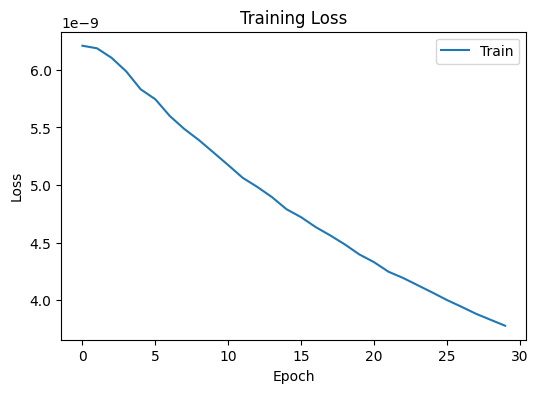

In [19]:
# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

# Training the model
history = model.fit(mnist, epochs=30)

# Plotting the graph of training loss
plt.figure(figsize=(6, 4))

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')

plt.show()

Evaluating the model

In [20]:
loss, accuracy = model.evaluate(mnist_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
if loss<0.1:
  print("Loss is very low tending to 0 and so is a good fit to the model")

157/157 [==============================] - 1s 4ms/step - loss: 0.0012 - accuracy: 0.9820
Test Loss: 0.0011609112843871117, Test Accuracy: 0.9819999933242798
Loss is very low tending to 0 and so is a good fit to the model
